In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = "../data/criminality/Criminality by neighbourhood and district.csv"
df = pd.read_csv(p, sep=";", encoding="utf-8-sig")
df.head()

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,Indelingswijziging_4,AantalInwoners_5,TotaalVermogenVernielingEnGeweld_6,TotaalVermogensmisdrijven_7,TotaalDiefstal_8,...,OverigeVernielingTegenOpenbareOrde_21,TotaalGeweldsEnSeksueleMisdrijven_22,Mishandeling_23,BedreigingEnStalking_24,OverigeGeweldsEnSeksueleMisdrijven_25,TotaalVermogenVernielingEnGeweld_26,TotaalVermogensmisdrijven_27,TotaalDiefstalUitWoningSchuurED_28,VernielingMisdrijfTegenOpenbareOrde_29,GeweldsEnSeksueleMisdrijven_30
0,0,GM1680,Aa en Hunze,Gemeente,GM1680,.,25390,423,284,199,...,14,66,26,23,17,17,11,2,2,3
1,1,WK168000,Aa en Hunze,Wijk,WK168000,1,3560,38,22,16,...,1,7,3,3,1,11,6,1,2,2
2,2,BU16800000,Aa en Hunze,Buurt,BU16800000,1,3415,37,21,15,...,1,7,3,3,1,11,6,1,2,2
3,3,BU16800009,Aa en Hunze,Buurt,BU16800009,1,145,1,1,1,...,0,0,0,0,0,7,7,0,0,0
4,4,WK168001,Aa en Hunze,Wijk,WK168001,1,1430,19,16,12,...,0,2,1,0,1,13,11,2,1,1


In [3]:
df = df.replace(".", np.nan)
for c in df.columns:
    if c in ["WijkenEnBuurten","Gemeentenaam_1","SoortRegio_2","Codering_3","Indelingswijziging_4"]:
        continue
    df[c] = pd.to_numeric(df[c], errors="coerce")
df.dtypes.head(12)

ID                                      int64
WijkenEnBuurten                        object
Gemeentenaam_1                         object
SoortRegio_2                           object
Codering_3                             object
Indelingswijziging_4                   object
AantalInwoners_5                        int64
TotaalVermogenVernielingEnGeweld_6    float64
TotaalVermogensmisdrijven_7           float64
TotaalDiefstal_8                      float64
Fietsendiefstal_9                     float64
DiefstalOverigeVervoermiddelen_10     float64
dtype: object

In [4]:
df.shape, df["SoortRegio_2"].value_counts(dropna=False).head(20)

((16771, 32),
 SoortRegio_2
 Buurt       13305
 Wijk         3086
 Gemeente      380
 Name: count, dtype: int64)

In [5]:
na = df.isna().mean().sort_values(ascending=False)
na.head(20), na.tail(10)

(TotaalDiefstalUitWoningSchuurED_28        0.105420
 TotaalVermogensmisdrijven_27              0.104824
 VernielingMisdrijfTegenOpenbareOrde_29    0.104824
 TotaalVermogenVernielingEnGeweld_26       0.104824
 GeweldsEnSeksueleMisdrijven_30            0.104824
 OverigeDiefstalInbraak_15                 0.053366
 DiefstalUitNietResidentieleGebouwen_14    0.051160
 TotaalDiefstalUitWoningSchuurED_13        0.043766
 DiefstalUitVanafVervoermiddelen_11        0.041381
 TotaalVernielingTegenOpenbareOrde_17      0.041381
 TotaalVermogenVernielingEnGeweld_6        0.041381
 ZakkenrollerijStraatroofEnBeroving_12     0.041381
 TotaalDiefstal_8                          0.041381
 TotaalVermogensmisdrijven_7               0.041381
 Fietsendiefstal_9                         0.041381
 DiefstalOverigeVervoermiddelen_10         0.041381
 TotaalGeweldsEnSeksueleMisdrijven_22      0.041381
 OverigeVernielingTegenOpenbareOrde_21     0.041381
 OverigeVernieling_20                      0.041381
 VernielingA

In [6]:
num = df.select_dtypes(include=["number"])
num.describe().T.sort_values("mean", ascending=False).head(15)

,count,mean,std,min,25%,50%,75%,max
ID,16771.0,8385.000000,4841.515018,0.0,4192.5,8385.0,12577.5,16770.0
AantalInwoners_5,16771.0,3072.585952,12889.724132,0.0,230.0,955.0,2475.0,854047.0
TotaalVermogenVernielingEnGeweld_6,16077.0,116.291099,799.766678,0.0,8.0,26.0,78.0,71295.0
TotaalVermogensmisdrijven_7,16077.0,84.170492,613.774079,0.0,6.0,18.0,54.0,56926.0
TotaalDiefstal_8,16077.0,69.828264,541.209911,0.0,4.0,13.0,43.0,50984.0
TotaalVermogenVernielingEnGeweld_26,15013.0,51.917671,193.001021,0.0,14.0,23.0,39.0,9385.0
TotaalVermogensmisdrijven_27,15013.0,39.092453,164.862570,0.0,10.0,16.0,28.0,8262.0
TotaalVernielingTegenOpenbareOrde_17,16077.0,17.040119,94.454862,0.0,1.0,4.0,13.0,6880.0
TotaalGeweldsEnSeksueleMisdrijven_22,16077.0,15.080488,97.262141,0.0,1.0,3.0,10.0,7489.0
OverigeVermogensmisdrijven_16,16077.0,14.342228,75.225522,0.0,1.0,4.0,11.0,5942.0


In [7]:
cols = [c for c in df.columns if c.endswith("_5") or c.endswith("_6") or c.endswith("_7") or c.endswith("_8")]
cols[:10]

['AantalInwoners_5',
 'TotaalVermogenVernielingEnGeweld_6',
 'TotaalVermogensmisdrijven_7',
 'TotaalDiefstal_8']

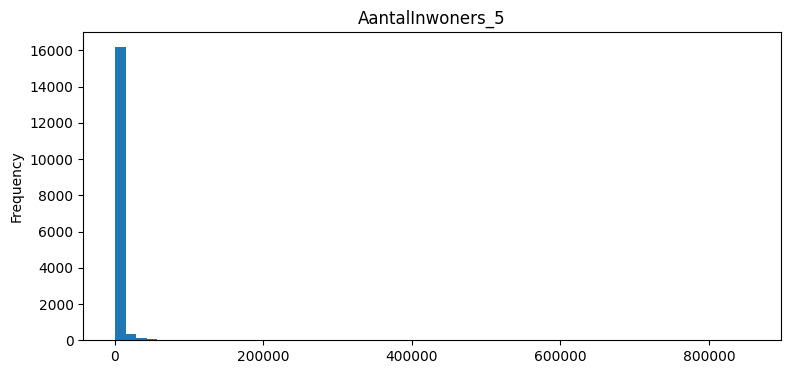

In [8]:
plt.figure(figsize=(9,4))
df["AantalInwoners_5"].dropna().plot(kind="hist", bins=60)
plt.title("AantalInwoners_5")
plt.show()

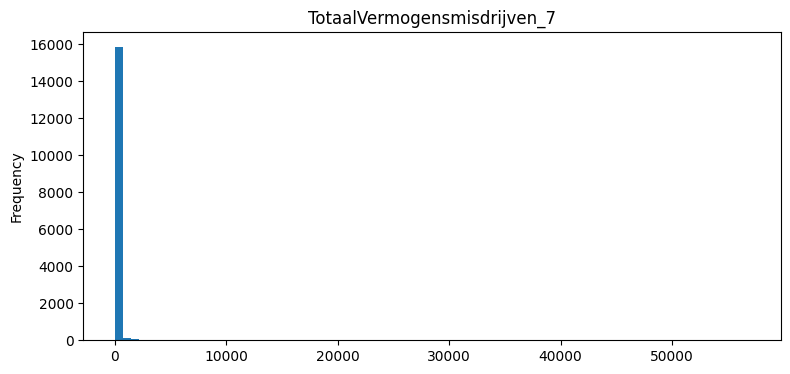

In [9]:
c = "TotaalVermogensmisdrijven_7"
plt.figure(figsize=(9,4))
df[c].dropna().plot(kind="hist", bins=80)
plt.title(c)
plt.show()

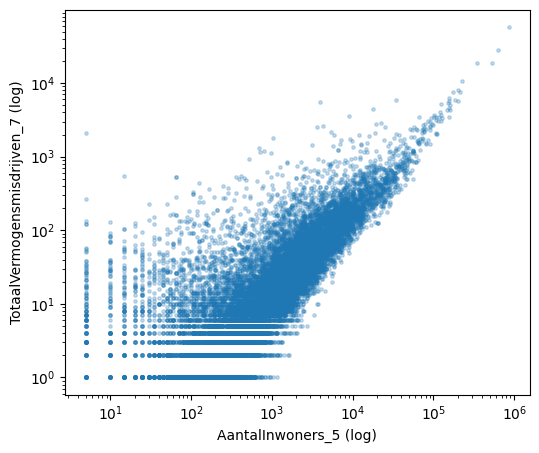

In [10]:
x = df["AantalInwoners_5"]
y = df["TotaalVermogensmisdrijven_7"]
m = x.notna() & y.notna()
plt.figure(figsize=(6,5))
plt.scatter(x[m], y[m], s=6, alpha=0.25)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("AantalInwoners_5 (log)")
plt.ylabel("TotaalVermogensmisdrijven_7 (log)")
plt.show()